<a href="https://colab.research.google.com/github/igolynker/NGG605/blob/main/HW20230908_Exponential_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PennNGG/Quantitative-Neuroscience/blob/master/Probability%20Distributions/Python/Exponential.ipynb)

Exponential distribution from the paper: Loos et al., Behavioral Brain Research, 2010. doi.org/10.1016/j.bbr.2010.05.027.
Fig1B discusses mouse response time to a go-no-go trial. The following adaptation of code of an exponential distribution mimcs the same distribution of the data seen in the paper.

# Definition

The exponential distribution describes the distribution of times between discrete events that are generated by a memoryless process; i.e., a Poisson point process. It is a special case of a gamma distribution.

Note that the exponential distribution is not the same as the exponential family of distributions, which includes the exponential distribution but also the normal, binomial, gamma, Poisson, and other distributions.

Mathematically, the probability density function of an exponential distribution is:

$f(x; \lambda) = \lambda e^{-\lambda x}$ when *x*≥0, 0 otherwise.

# Getting Started with Code


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import binom
from scipy.stats import expon


# Tutorial

number of events expected=1000, actual=1007


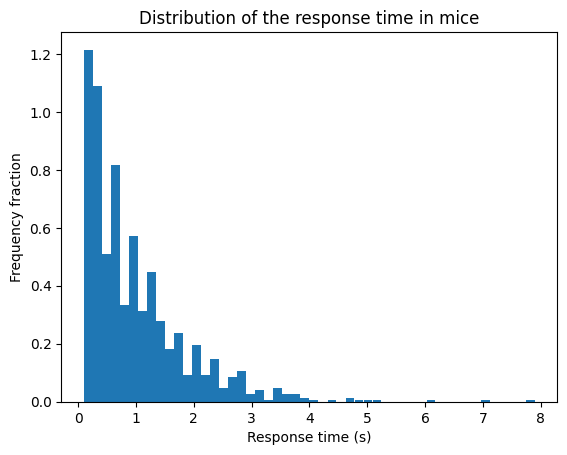

In [43]:
# Let's go back to simulating a Poisson process as the limit of a sequence of
# Bernoulli trials as the interval size->0.
delta_t = 1000          # Assume the whole process takes this long
plambda = 1             # Frequency/Rate (events per sec)
num_bins_per_second = 10    # Number of bins in which to check for events
total_bins = round(num_bins_per_second*delta_t)

# First convert lambda (overall rate) to probability/bin, using deltaT
#   events/time divided by bins/time = events/bin
p = plambda * delta_t / total_bins

# Now simulate checking one "outcome" per bin, using the given probability/bin
outcomes = binom.rvs(1, p, size=total_bins)

# Check that the nubmer of events is what we expect
print(f'number of events expected={plambda*delta_t}, actual={np.sum(outcomes==1)}')

# Now for the next part -- instead of looking at the counts per interval,
#   which is what the Poisson distribution described, we are now going to look
#   at the same data but are considering the intervals between events. As you
#   will see below, these intervals are distributed as an exponential.
# First look at the histogram of intervals between events
# Get intervals
intervals_between_events = np.diff(np.where(outcomes==1))

# Convert to seconds
intervals_between_events_sec = intervals_between_events/num_bins_per_second

# Make and show the normalized histogram. Here the interval is a continuous
#   variable (the x-axis is binned in the histogram to visualize it, but the
#   actual values can take on any continuous value because they represent the
#   amount of time since the previous event), so to normalize the histogram to
#   make a pdf we can't just sum the values -- we have to sum the values
#   multiplied by the bin width (i.e., take the integral). We use numpy's
#   "trapz" which treats each bin as a trapezoid (because the heights before
#   and after can be slightly different) to compute the integral:
counts, edges = np.histogram(intervals_between_events_sec, bins=50)
plt.bar(edges[:-1], np.divide(counts, np.trapz(counts, edges[:-1])), width=0.15, align='edge')
plt.title('Distribution of the response time in mice')
plt.xlabel('Response time (s)')
plt.ylabel('Frequency fraction')

# Compare to an exponential distribution (see below), in red, with the rate
#   parameter lambda equal to 1/lambda
# plt.plot(edges[:-1], expon.pdf(edges[:-1], scale=1/plambda), 'r-', linewidth=2)
plt.show()

# Additional Resources

Working with the exponential distribution in [Matlab](https://www.mathworks.com/help/stats/exponential-distribution.html), [R](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/Exponential), and [Python](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html).

# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania